 ### Magnetic field (Biot-Savart Law)
 
 The Biot-Savart law allows us to compute the magnetic field produced by any constant electric current at any position in space. Let's suppose we have a wire, of path $C$, carrying an electric current $I$. Then, the magnetic field at any position is
 
$$ B (\vec {r} )={\frac {I\mu _{0}}{4\pi }}\int _{C}{\frac {d{\vec{l}}\times  {\vec {r}}'}{|\vec{r'} |^{3}}}  = {\frac {I\mu _{0}}{4\pi }}\int _{C}{\frac {d{\vec{l}}\times {(\vec {r} - \vec{l}}) }{|\vec {r} - \vec{l} |^{3}}} \tag{1} $$


where $d{\vec{l}}$ is the infinitesimal length of the wire carrying an electric current $I$, and $\mu_{0} = 4 \pi ·10^{-7}$ T·m·A$^{-1}$ is the vacuum permeability . The integral is extended over the path of the wire,  $C$. 

To make the calculations easier we're going to express this equation in terms of dimensionless quantities. Considering a caracteristic distance of the system, $R$, we make the following change of variable: $\vec{l} \rightarrow \vec{l}/R, $ $ \vec{r} \rightarrow \vec{r}/R  $. Thus, the equation [1] can be rewritten as 

$$ \frac{4\pi R}{\mu_0 I} B(\vec{r} )= \int _{C}{\frac {d{\vec{l}}\times {(\vec {r} - \vec{l}}) }{|\vec {r} - \vec{l} |^{3}}} \tag{2}$$

which is, in fact, a dimensionless equation. 



In [256]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import sympy as smp
from sympy.vector import cross

In [257]:
#Defining the wire curve

def l(shape):
    
    #Most common geometries
    
    if shape == 'wire':
        
        z = np.linspace(-1, 1, 100)
        a = [np.zeros(len(z)), np.zeros(len(z)), z]
    
    elif shape == 'loop':
        
        theta = np.linspace(0, 2*np.pi, 100)
        a = [np.cos(theta), np.sin(theta), np.zeros(len(theta))]
        
    elif shape == 'solenoid':
        
        theta = np.linspace(-np.pi, np.pi, 600)
        N = 40
        length = 5
        a = [np.cos(N*theta), np.sin(N*theta), theta*length/(2*np.pi)]
        
    elif shape == 'toroid':
        
        theta = np.linspace(-np.pi, np.pi, 600)
        r = 0.4
        R = 2
        N = 50
        a = [(R + r*np.cos(N*theta))*np.cos(theta), (R + r*np.cos(N*theta))*np.sin(theta), r*np.sin(N*theta)]

    return np.array(a)

shape = 'loop'
lx, ly, lz = l(shape)

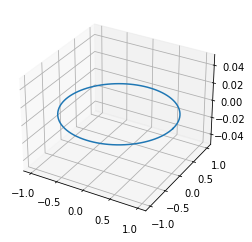

In [258]:
#Plotting the wire curve

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(lx, ly, lz)

plt.show()

We'll start solving the equation [2] symbolically using **Simpy**. Then, we'll transform the solution into a numerical one to plot the results. 

First, we define our variables

In [259]:
theta, x, y, z = smp.symbols('theta, x, y, z')

Defining the wire curve, position and the separation vector:

In [260]:
def l_element(shape, theta):
    
    if shape == 'wire':
        
        l = smp.Matrix([0, 0, theta])
        
    elif shape == 'loop':
        
        l = smp.Matrix([smp.cos(theta), smp.sin(theta), 0])
        
    elif shape == 'solenoid':
        
        theta = np.linspace(-np.pi, np.pi, 600)
        N = 40
        length = 5
        
        l = smp.Matrix([smp.cos(N*theta), smp.sin(N*theta), theta*length/(2*smp.pi)])
        
    elif shape == 'toroid':

        r = 0.4
        R = 2
        N = 50
        
        l = smp.Matrix([(R + r*smp.cos(N*theta))*smp.cos(theta), (R + r*smp.cos(N*theta))*smp.sin(theta), r*smp.sin(N*theta)])
    
    return l

In [261]:
l = l_element(shape, theta)
r = smp.Matrix([x, y, z])
sep = r - l
l

Matrix([
[cos(theta)],
[sin(theta)],
[         0]])

Since we have the wire curve vector in terms of an auxiliar variable, $\theta$, we need to apply the chain rule to the [2] expression. Thus, we have the following

$$ \frac{4\pi R}{\mu_0 I} B(\vec{r} )= \int _{a}^{b}{\frac {d{\vec{l}/{d\theta}}\times {(\vec {r} - \vec{l}}) }{|\vec {r} - \vec{l} |^{3}}}d\theta  \equiv \int _{a}^{b} A(\theta)d\theta \tag{3}$$



In [262]:
#Defininf A(theta)
A = smp.diff(l, theta).cross(sep) / sep.norm()**3

We have now the symbollic integral defined. We need to tranform this into a numerical expression to solve the integral numerically.

In [263]:
#Components of the integrand A(theta)

dBx = smp.lambdify([theta, x, y, z], A[0])
dBy = smp.lambdify([theta, x, y, z], A[1])
dBz = smp.lambdify([theta, x, y, z], A[2])

In [264]:
from scipy.integrate import quad

if shape == 'wire':
    
    def get_B(x, y, z):
        
        '''
        The 'quad' method returns the result in a shape
        of (result, error). We only want the result, [0]
        '''

        #Limits of integration
        a = -1
        b = 1
        
        Bx = quad(dBx, a, b, args=(x, y, z))[0]
        By = quad(dBy, a, b, args=(x, y, z))[0]
        Bz = quad(dBz, a, b, args=(x, y, z))[0]
        
        return np.array([Bx, By, Bz])

else:
    
    def get_B(x, y, z):

        #Limits of integration
        a = 0
        b = 2*np.pi
        
        Bx = quad(dBx, a, b, args=(x, y, z))[0]
        By = quad(dBy, a, b, args=(x, y, z))[0]
        Bz = quad(dBz, a, b, args=(x, y, z))[0]
        
        return np.array([Bx, By, Bz])   

In [265]:
#Defining a 3d-grid

if shape == 'wire':
    
    x = np.linspace(-1, 1, 10)
    y = np.linspace(-1, 1, 10)
    z = np.linspace(-2, 2, 20)
    
elif shape == 'loop':
    
    x = np.linspace(-1.5, 1.5, 15)
    y = np.linspace(-1.5, 1.5, 15)
    z = np.linspace(-3, 3, 60)
    
elif shape == 'solenoid':
    
    x = np.linspace(-1.5, 1.5, 15)
    y = np.linspace(-1.5, 1.5, 15)
    z = np.linspace(-7, 7, 100)

elif shape == 'toroid':
    
    x = np.linspace(-3, 3, 30)
    y = np.linspace(-3, 3, 30)
    z = np.linspace(-2, 2, 20)
    
xv, yv, zv = np.meshgrid(x, y, z)

In [266]:
B = np.vectorize(get_B, signature='(),(),()->(n)')(xv, yv, zv)
Bx = B[:,:,:,0]
By = B[:,:,:,1]
Bz = B[:,:,:,2]

In [267]:
#Interactive quiver plot
from mayavi.mlab import quiver3d, plot3d
import mayavi.mlab as mv
mv.init_notebook()

Notebook initialized with ipy backend.


In [268]:
mv.figure(bgcolor = (1,1,1))
plot3d(lx, ly, lz, color = (0,0,0))
quiver3d(xv, yv, zv, Bx, By, Bz, mask_points = 3)


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

We see that for the loop geometry we get the expected result: the magnetic field perpendicular to the wire. Due to the geometry of the loop, the magnetic field in the center axis is perpendicular to the loop itself.  

Let's compare the numerical result along that axis with the analytical result. It is known that the magnetic field along the central axis, $r = 0$, is

$$ \vec{B} = \frac{\mu_0 I R^2}{2(z^2 + R^2)^{3/2}} \hat{k} \tag{4}$$

being R the radius of the loop. 

In [269]:
mu = 4*np.pi * 10**-7
I = 1

In [270]:
def B_analytic(z):
    
    #We assume R = 1
    return mu*I/(z**2 + 1)**(3/2) / 2

In [271]:
#Numeric B along the axis r = 0:

B_centre = Bz[7,7,:] * mu * I / (4*np.pi)  #Undoing the change of variable

Text(0, 0.5, 'Magnetic field [T]')

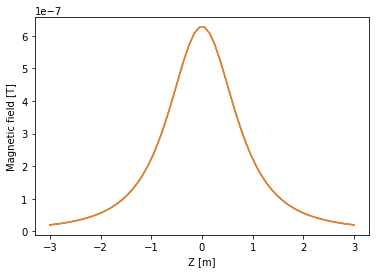

In [275]:
plt.plot(z, B_centre)
plt.plot(z, B_analytic(z))
plt.xlabel('Z [m]')
plt.ylabel('Magnetic field [T]')

We get exactly the same result.